In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("//Users//udayladdha//Desktop/Data science//DataSets//Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.drop(columns=["User ID","Gender"],inplace=True)

In [4]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
np.round(df.describe(),2)

,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00
mean,37.66,69742.50,0.36
std,10.48,34096.96,0.48
min,18.00,15000.00,0.00
25%,29.75,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,150000.00,1.00


In [11]:
scaled_x_train=scaler.fit_transform(x_train)
scated_x_test=scaler.transform(x_test)

In [12]:
np.round(pd.DataFrame(scaled_x_train,columns=x_train.columns).describe(),2)

,Age,EstimatedSalary
count,320.00,320.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.87,-1.63
25%,-0.76,-0.77
50%,-0.07,0.01
75%,0.69,0.53
max,2.11,2.41


In [13]:
scaled_x_train=pd.DataFrame(scaled_x_train,columns=x_train.columns)
scaled_x_test=pd.DataFrame(scated_x_test,columns=x_test.columns)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

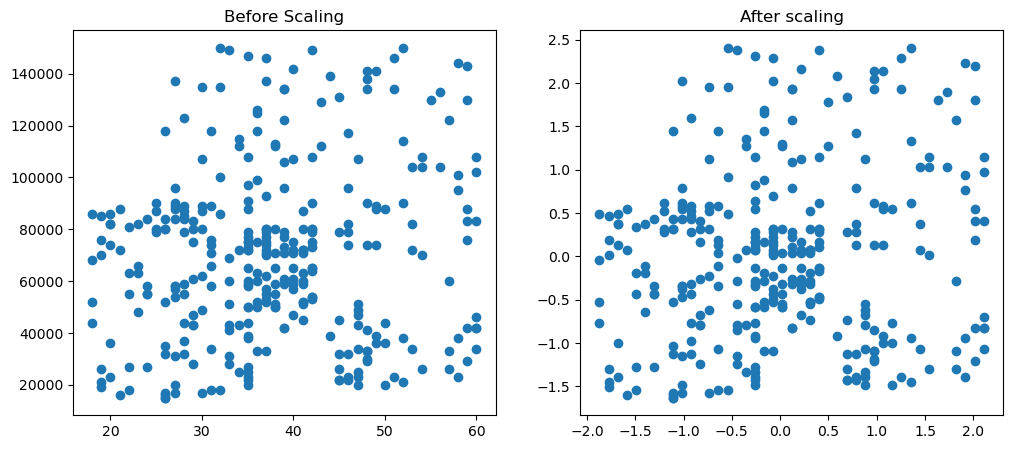

In [15]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train["Age"],x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(scaled_x_train["Age"],scaled_x_train["EstimatedSalary"])
ax2.set_title("After scaling")
plt.show()

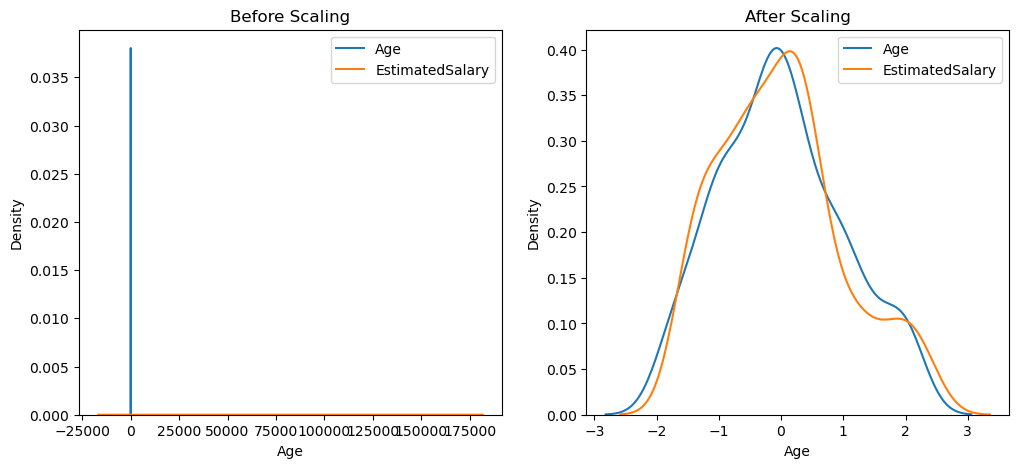

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"],ax=ax1,label="Age")
sns.kdeplot(x_train["EstimatedSalary"],ax=ax1,label="EstimatedSalary")
ax1.legend()


ax2.set_title("After Scaling")
sns.kdeplot(scaled_x_train["Age"],ax=ax2,label="Age")
sns.kdeplot(scaled_x_train["EstimatedSalary"],ax=ax2,label="EstimatedSalary")
ax2.legend()


plt.show()